In [102]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [103]:
df=pd.read_csv('C:/Users/Rakesh/3-Zomato Data Analysis/zomato.csv')

In [104]:
df.head()

url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table   rate  votes                             phone  \
0          Yes        Yes  4.1/5    775    080 42297555\r\n+91 9743772233   
1          Yes         No  4.1/5    787                      080 41714161   
2          Yes         No  3.8/5    918                    +91 9663487993   
3           No         No  3.7/5     88                    +91 9620009302   
4           No         No  3.8/5    166  +91 8026612447\r\n+91 9901210005   

       location            rest_type  \
0  Banashankari        Casual Dining   
1  Banashankari        Casual Dining   
2  Banashankari  Cafe, Casual Dining   
3  Banashankari          Quick Bites   
4  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                         800   
1     Chinese, North Indian, Thai                         800   
2          Cafe, Mexican, Italian                         800   
3      South Indian, North Indian                         300   
4        North Indian, Rajasthani                         600   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)  
0          Buffet    Banashankari  
1          Buffet    Banashankari  
2          Buffet    Banashankari  
3          Buffet    Banashankari  
4          Buffet    Banashankari

In [105]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [106]:
df.dtypes

url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object

In [107]:
df.shape

(51717, 17)

In [108]:
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [109]:
feature_na=[feature for feature in df.columns if df[feature].isnull().sum()>0]

In [110]:
feature_na

['rate',
 'phone',
 'location',
 'rest_type',
 'dish_liked',
 'cuisines',
 'approx_cost(for two people)']

In [111]:
for feature in feature_na:
    print(' {} has {} missing values'.format(feature,np.round(df[feature].isnull().sum()/len(df)*100,4)))

 rate has 15.0337 missing values
 phone has 2.3358 missing values
 location has 0.0406 missing values
 rest_type has 0.4389 missing values
 dish_liked has 54.2916 missing values
 cuisines has 0.087 missing values
 approx_cost(for two people) has 0.669 missing values


In [112]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [113]:
df.dropna(axis='index',subset=['rate'],inplace=True)

In [114]:
df.shape

(43942, 17)

In [115]:
def split(x):
    return x.split('/')[0]

In [116]:
df['rate']=df['rate'].apply(split)

In [117]:
df.head()

url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table rate  votes                             phone  \
0          Yes        Yes  4.1    775    080 42297555\r\n+91 9743772233   
1          Yes         No  4.1    787                      080 41714161   
2          Yes         No  3.8    918                    +91 9663487993   
3           No         No  3.7     88                    +91 9620009302   
4           No         No  3.8    166  +91 8026612447\r\n+91 9901210005   

       location            rest_type  \
0  Banashankari        Casual Dining   
1  Banashankari        Casual Dining   
2  Banashankari  Cafe, Casual Dining   
3  Banashankari          Quick Bites   
4  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                         800   
1     Chinese, North Indian, Thai                         800   
2          Cafe, Mexican, Italian                         800   
3      South Indian, North Indian                         300   
4        North Indian, Rajasthani                         600   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)  
0          Buffet    Banashankari  
1          Buffet    Banashankari  
2          Buffet    Banashankari  
3          Buffet    Banashankari  
4          Buffet    Banashankari

In [118]:
df.replace('NEW',0,inplace=True)

In [119]:
df.replace('-',0,inplace=True)

In [120]:
df['rate'].dtypes

dtype('O')

In [121]:
 df['rate']=df['rate'].astype(float)

In [122]:
df.head()

url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table  rate  votes                             phone  \
0          Yes        Yes   4.1    775    080 42297555\r\n+91 9743772233   
1          Yes         No   4.1    787                      080 41714161   
2          Yes         No   3.8    918                    +91 9663487993   
3           No         No   3.7     88                    +91 9620009302   
4           No         No   3.8    166  +91 8026612447\r\n+91 9901210005   

       location            rest_type  \
0  Banashankari        Casual Dining   
1  Banashankari        Casual Dining   
2  Banashankari  Cafe, Casual Dining   
3  Banashankari          Quick Bites   
4  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                         800   
1     Chinese, North Indian, Thai                         800   
2          Cafe, Mexican, Italian                         800   
3      South Indian, North Indian                         300   
4        North Indian, Rajasthani                         600   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)  
0          Buffet    Banashankari  
1          Buffet    Banashankari  
2          Buffet    Banashankari  
3          Buffet    Banashankari  
4          Buffet    Banashankari

# Calculate average rating of each restaurant

In [123]:
df_rate=df.groupby('name')['rate'].mean().to_frame().reset_index()

In [124]:
df_rate

name      rate
0                                     #FeelTheROLL  3.400000
1                                       #L-81 Cafe  3.900000
2                                          #refuel  3.700000
3                                         1000 B.C  3.200000
4             100ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ°C  3.700000
...                                            ...       ...
7157                    i-Bar - The Park Bangalore  3.800000
7158                        iFruit Live Ice Creams  3.400000
7159                             iSpice Resto Cafe  3.700000
7160                                       nu.tree  4.314286
7161  re:cess - Hilton Bangalore Embassy GolfLinks  4.100000

[7162 rows x 2 columns]

In [125]:
df_rate.columns=['Restaurant','Avg_rating']

In [126]:
df_rate.head()

Restaurant  Avg_rating
0                          #FeelTheROLL         3.4
1                            #L-81 Cafe         3.9
2                               #refuel         3.7
3                              1000 B.C         3.2
4  100ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ°C         3.7

In [127]:
import seaborn as sns

C:\Users\Rakesh\Downloads\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='Avg_rating', ylabel='Density'>

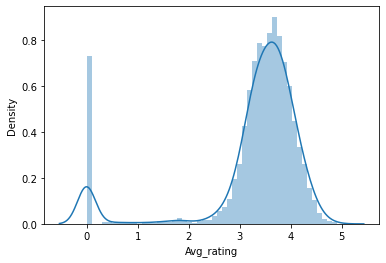

In [128]:
sns.distplot(df_rate['Avg_rating'])

# Top Restaurant chains in Bengaluru

Text(0.5, 0, 'Number of Outlets')

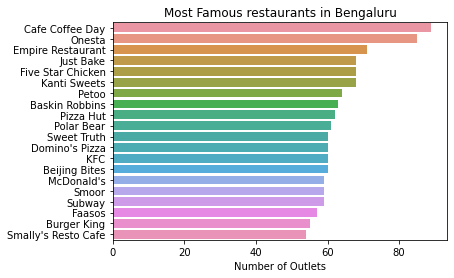

In [129]:
chains=df['name'].value_counts()[0:20]
sns.barplot(x=chains,y=chains.index)
plt.title('Most Famous restaurants in Bengaluru')
plt.xlabel('Number of Outlets')

# How many of the restaurants do not accept Online Orders

In [130]:
x=df['online_order'].value_counts()
x

Yes    28308
No     15634
Name: online_order, dtype: int64

In [131]:
import plotly.express as px

In [132]:
labels=['Accepted','Not Accepted']

In [133]:
px.pie(df,values=x,labels=labels,title="Pie Chart")

In [134]:
y=df['book_table'].value_counts()
y

No     37509
Yes     6433
Name: book_table, dtype: int64

In [135]:
import plotly.graph_objs as go
from plotly.offline import iplot

In [136]:
labels=['Not booked', 'Booked']

In [137]:
trace=go.Pie(labels=labels,values=y,hoverinfo='label+percent',textinfo='value')
iplot([trace])

# In depth Analysis of Types of Restaurants we have

In [138]:
df['rest_type'].isnull().sum()

151

In [139]:
df['rest_type'].dropna(inplace=True)

In [140]:
df['rest_type'].isna().sum()

151

<AxesSubplot:xlabel='name'>

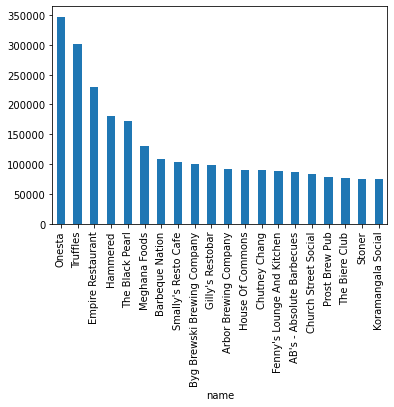

In [141]:
df.groupby('name')['votes'].sum().nlargest(20).plot.bar()

In [142]:
trace1=go.Bar(x=df.groupby('name')['votes'].sum().nlargest(20).index,
              y=df.groupby('name')['votes'].sum().nlargest(20))

In [143]:
iplot([trace1])

# Total Restaurants at different locations of Bengaluru

In [144]:
restaurant=[]
location=[]
for key,location_df in df.groupby('location'):
    location.append(key)
    restaurant.append(len(location_df['name'].unique()))

In [145]:
df_total=pd.DataFrame(zip(location,restaurant))
df_total.head()

0    1
0                BTM  581
1       Banashankari  238
2          Banaswadi  151
3  Bannerghatta Road  362
4       Basavanagudi  195

In [146]:
df_total.columns=['location','restaurant']

In [147]:
df_total.head()

location  restaurant
0                BTM         581
1       Banashankari         238
2          Banaswadi         151
3  Bannerghatta Road         362
4       Basavanagudi         195

<AxesSubplot:>

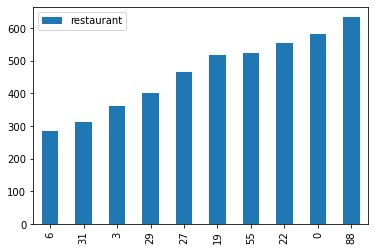

In [148]:
df_total.sort_values(by='restaurant').tail(10).plot.bar()

In [149]:
cuisines=df['cuisines'].value_counts()[0:10]
cuisines

North Indian                           2294
North Indian, Chinese                  2060
South Indian                           1320
Cafe                                    653
Bakery, Desserts                        644
Biryani                                 641
South Indian, North Indian, Chinese     601
Fast Food                               580
Desserts                                572
Chinese                                 449
Name: cuisines, dtype: int64

In [150]:
trace3=go.Bar(x=df['cuisines'].value_counts()[0:10].index, y=df['cuisines'].value_counts()[0:10])

In [151]:
iplot([trace3])

# Analyse aproximate cost for two peoples

In [152]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [153]:
df['approx_cost(for two people)'].isnull().sum()

252

In [154]:
df.dropna(axis='index', subset=['approx_cost(for two people)'],inplace=True)

In [155]:
df['approx_cost(for two people)'].isnull().sum()

0

In [156]:
df['approx_cost(for two people)'].dtypes

dtype('O')

In [157]:
df['approx_cost(for two people)'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '1,700', '1,400', '1,350', '2,200', '2,000',
       '1,800', '1,900', '180', '330', '2,500', '2,100', '3,000', '2,800',
       '3,400', '50', '40', '1,250', '3,500', '4,000', '2,400', '2,600',
       '1,450', '70', '3,200', '560', '240', '360', '6,000', '1,050',
       '2,300', '4,100', '120', '5,000', '3,700', '1,650', '2,700',
       '4,500'], dtype=object)

In [158]:
df['approx_cost(for two people)']=df['approx_cost(for two people)'].apply(lambda x: x.replace(',',''))

In [163]:
df['approx_cost(for two people)'].unique()

array([ 800,  300,  600,  700,  550,  500,  450,  650,  400,  900,  200,
        750,  150,  850,  100, 1200,  350,  250,  950, 1000, 1500, 1300,
        199,   80, 1100,  160, 1600,  230,  130, 1700, 1400, 1350, 2200,
       2000, 1800, 1900,  180,  330, 2500, 2100, 3000, 2800, 3400,   50,
         40, 1250, 3500, 4000, 2400, 2600, 1450,   70, 3200,  560,  240,
        360, 6000, 1050, 2300, 4100,  120, 5000, 3700, 1650, 2700, 4500])

In [164]:
df['approx_cost(for two people)']=df['approx_cost(for two people)'].astype(int)

In [165]:
df['approx_cost(for two people)'].dtypes

dtype('int32')

C:\Users\Rakesh\Downloads\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='approx_cost(for two people)', ylabel='Density'>

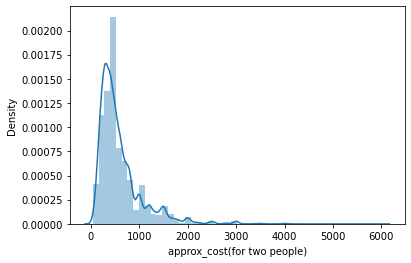

In [166]:
sns.distplot(df['approx_cost(for two people)'])

# Analyse approx cost vs rating 

<AxesSubplot:xlabel='rate', ylabel='approx_cost(for two people)'>

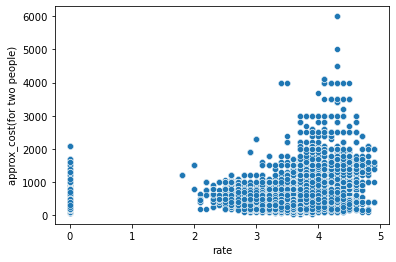

In [167]:
sns.scatterplot(x='rate',y='approx_cost(for two people)',data=df)

<AxesSubplot:xlabel='rate', ylabel='approx_cost(for two people)'>

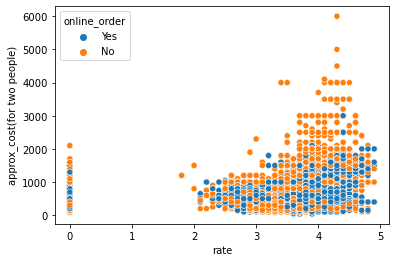

In [168]:
sns.scatterplot(x='rate',y='approx_cost(for two people)',hue='online_order',data=df)

# Votes for restaurant accepting vs not accepting online orders

<AxesSubplot:xlabel='online_order', ylabel='votes'>

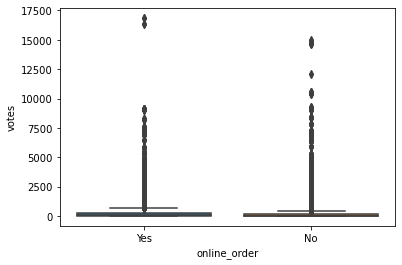

In [169]:
sns.boxplot(x='online_order', y='votes', data=df)

In [170]:
px.box(df,x='online_order',y='votes')

In [171]:
px.box(df,x='online_order',y='approx_cost(for two people)')

# Luxurious restaurant in Bengaluru

In [172]:
df['approx_cost(for two people)'].min()

40

In [173]:
df['approx_cost(for two people)'].max()

6000

In [174]:
df[df['approx_cost(for two people)']==6000]['name']

19139    Le Cirque Signature - The Leela Palace
45618    Le Cirque Signature - The Leela Palace
Name: name, dtype: object

# Top 10 restaurants with approx cost for two people

In [176]:
df_res=df.groupby('approx_cost(for two people)')['name'].unique().to_frame()

In [177]:
df_res.head()

name
approx_cost(for two people)                                                   
40                           [Srinidhi Sagar Food Line, Srinidhi Sagar, Sri...
50                                                               [Savera Cafe]
70                                                [Namaste, Nellore Dosa Camp]
80                                     [Dtink Lab, Bangarpet Chats, Dosa Cafe]
100                          [Namma Brahmin's Idli, Coffee Bytes, Ruchi Maa...

In [178]:
df_res=df.groupby('approx_cost(for two people)')['name'].unique().to_frame().reset_index()

In [179]:
df_res.head()

approx_cost(for two people)  \
0                           40   
1                           50   
2                           70   
3                           80   
4                          100   

                                                name  
0  [Srinidhi Sagar Food Line, Srinidhi Sagar, Sri...  
1                                      [Savera Cafe]  
2                       [Namaste, Nellore Dosa Camp]  
3            [Dtink Lab, Bangarpet Chats, Dosa Cafe]  
4  [Namma Brahmin's Idli, Coffee Bytes, Ruchi Maa...

In [182]:
df_res.tail(10)

approx_cost(for two people)  \
56                         3000   
57                         3200   
58                         3400   
59                         3500   
60                         3700   
61                         4000   
62                         4100   
63                         4500   
64                         5000   
65                         6000   

                                                 name  
56  [Rim Naam - The Oberoi, Le Jardin - The Oberoi...  
57                   [Blue Ginger - The Taj West End]  
58  [The Market - The Ritz-Carlton, b CafÃÂÃÂÃ...  
59  [Karavalli - The Gateway Hotel, Kebabs & Kurri...  
60              [Baluchi - The Lalit Ashok Bangalore]  
61  [Alba - JW Marriott Bengaluru, Edo Restaurant ...  
62                       [La Brasserie - Le Meridien]  
63                           [Malties - Radisson Blu]  
64                       [Royal Afghan - ITC Windsor]  
65           [Le Cirque Signature - The Leela Palace]

In [183]:
df_res.head(10)

approx_cost(for two people)  \
0                           40   
1                           50   
2                           70   
3                           80   
4                          100   
5                          120   
6                          130   
7                          150   
8                          160   
9                          180   

                                                name  
0  [Srinidhi Sagar Food Line, Srinidhi Sagar, Sri...  
1                                      [Savera Cafe]  
2                       [Namaste, Nellore Dosa Camp]  
3            [Dtink Lab, Bangarpet Chats, Dosa Cafe]  
4  [Namma Brahmin's Idli, Coffee Bytes, Ruchi Maa...  
5                         [Malleshwaram Dosa Corner]  
6                             [Natural Mumbai Kulfi]  
7  [Maruthi Davangere Benne Dosa, Shree Cool Poin...  
8                               [Ambur Dum Biriyani]  
9             [Pabrai's Fresh & Naturelle Icecreams]

# Restaurants below 500 

In [184]:
df_res[df_res['approx_cost(for two people)']<=500]['name'] 

0     [Srinidhi Sagar Food Line, Srinidhi Sagar, Sri...
1                                         [Savera Cafe]
2                          [Namaste, Nellore Dosa Camp]
3               [Dtink Lab, Bangarpet Chats, Dosa Cafe]
4     [Namma Brahmin's Idli, Coffee Bytes, Ruchi Maa...
5                            [Malleshwaram Dosa Corner]
6                                [Natural Mumbai Kulfi]
7     [Maruthi Davangere Benne Dosa, Shree Cool Poin...
8                                  [Ambur Dum Biriyani]
9                [Pabrai's Fresh & Naturelle Icecreams]
10                                     [Veganbreak24x7]
11    [Coffee Tindi, Chaatimes, Five Star Chicken, P...
12                       [Rock Stone Ice Cream Factory]
13                              [Nami's Global Kitchen]
14    [Chickpet Donne Biryani House, Kaggis, The For...
15    [Addhuri Udupi Bhojana, T3H Cafe, Hide Out Caf...
16                                       [Burrito Boys]
17    [Upahar Sagar, Wahab, Calcutta Cafe, Mini 

In [186]:
df_res[df_res['approx_cost(for two people)']<=500]

approx_cost(for two people)  \
0                            40   
1                            50   
2                            70   
3                            80   
4                           100   
5                           120   
6                           130   
7                           150   
8                           160   
9                           180   
10                          199   
11                          200   
12                          230   
13                          240   
14                          250   
15                          300   
16                          330   
17                          350   
18                          360   
19                          400   
20                          450   
21                          500   

                                                 name  
0   [Srinidhi Sagar Food Line, Srinidhi Sagar, Sri...  
1                                       [Savera Cafe]  
2                        [Namaste, Nellore Dosa Camp]  
3             [Dtink Lab, Bangarpet Chats, Dosa Cafe]  
4   [Namma Brahmin's Idli, Coffee Bytes, Ruchi Maa...  
5                          [Malleshwaram Dosa Corner]  
6                              [Natural Mumbai Kulfi]  
7   [Maruthi Davangere Benne Dosa, Shree Cool Poin...  
8                                [Ambur Dum Biriyani]  
9              [Pabrai's Fresh & Naturelle Icecreams]  
10                                   [Veganbreak24x7]  
11  [Coffee Tindi, Chaatimes, Five Star Chicken, P...  
12                     [Rock Stone Ice Cream Factory]  
13                            [Nami's Global Kitchen]  
14  [Chickpet Donne Biryani House, Kaggis, The For...  
15  [Addhuri Udupi Bhojana, T3H Cafe, Hide Out Caf...  
16                                     [Burrito Boys]  
17  [Upahar Sagar, Wahab, Calcutta Cafe, Mini Punj...  
18                                     [Cake N Cream]  
19  [360 Atoms Restaurant And Cafe, The Vintage Ca...  
20  [Caf-Eleven, Recipe, Petoo, Roving Feast, Fres...  
21  [CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© Down The ...

# Restaurants that have good rating >4 and that are coming under budget 

In [187]:
df[(df['rate']>4) & (df_res['approx_cost(for two people)']<=500)].shape

(7, 17)

In [188]:
len(df[(df['rate']>4) & (df_res['approx_cost(for two people)']<=500)]['name'].unique())

7

In [189]:
df_res.shape

(66, 2)

In [190]:
data=df.copy()

In [191]:
data.set_index('name',inplace=True)

In [192]:
data.head()

url  \
name                                                                       
Jalsa                  https://www.zomato.com/bangalore/jalsa-banasha...   
Spice Elephant         https://www.zomato.com/bangalore/spice-elephan...   
San Churro Cafe        https://www.zomato.com/SanchurroBangalore?cont...   
Addhuri Udupi Bhojana  https://www.zomato.com/bangalore/addhuri-udupi...   
Grand Village          https://www.zomato.com/bangalore/grand-village...   

                                                                 address  \
name                                                                       
Jalsa                  942, 21st Main Road, 2nd Stage, Banashankari, ...   
Spice Elephant         2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...   
San Churro Cafe        1112, Next to KIMS Medical College, 17th Cross...   
Addhuri Udupi Bhojana  1st Floor, Annakuteera, 3rd Stage, Banashankar...   
Grand Village          10, 3rd Floor, Lakshmi Associates, Gandhi Baza...   

                      online_order book_table  rate  votes  \
name                                                         
Jalsa                          Yes        Yes   4.1    775   
Spice Elephant                 Yes         No   4.1    787   
San Churro Cafe                Yes         No   3.8    918   
Addhuri Udupi Bhojana           No         No   3.7     88   
Grand Village                   No         No   3.8    166   

                                                  phone      location  \
name                                                                    
Jalsa                    080 42297555\r\n+91 9743772233  Banashankari   
Spice Elephant                             080 41714161  Banashankari   
San Churro Cafe                          +91 9663487993  Banashankari   
Addhuri Udupi Bhojana                    +91 9620009302  Banashankari   
Grand Village          +91 8026612447\r\n+91 9901210005  Basavanagudi   

                                 rest_type  \
name                                         
Jalsa                        Casual Dining   
Spice Elephant               Casual Dining   
San Churro Cafe        Cafe, Casual Dining   
Addhuri Udupi Bhojana          Quick Bites   
Grand Village                Casual Dining   

                                                              dish_liked  \
name                                                                       
Jalsa                  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
Spice Elephant         Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
San Churro Cafe        Churros, Cannelloni, Minestrone Soup, Hot Choc...   
Addhuri Udupi Bhojana                                        Masala Dosa   
Grand Village                                        Panipuri, Gol Gappe   

                                             cuisines  \
name                                                    
Jalsa                  North Indian, Mughlai, Chinese   
Spice Elephant            Chinese, North Indian, Thai   
San Churro Cafe                Cafe, Mexican, Italian   
Addhuri Udupi Bhojana      South Indian, North Indian   
Grand Village                North Indian, Rajasthani   

                       approx_cost(for two people)  \
name                                                 
Jalsa                                          800   
Spice Elephant                                 800   
San Churro Cafe                                800   
Addhuri Udupi Bhojana                          300   
Grand Village                                  600   

                                                            reviews_list  \
name                                                                       
Jalsa                  [('Rated 4.0', 'RATED\n  A beautiful place to ...   
Spice Elephant         [('Rated 4.0', 'RATED\n  Had been here for din...   
San Churro Cafe        [('Rated 3.0', "RATED\n  Ambience is not that ...   
Addhuri Udupi Bhojana  [('Rated 4.0', "RA

<AxesSubplot:xlabel='name'>

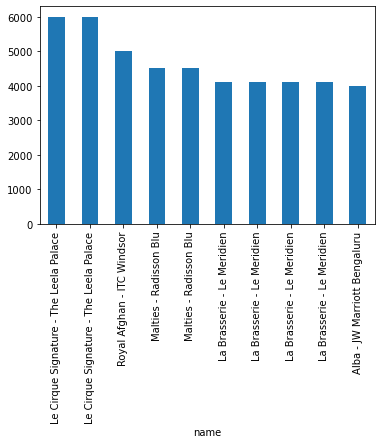

In [193]:
data['approx_cost(for two people)'].nlargest(10).plot.bar()

In [194]:
df[(df['rate']>4) & (df['approx_cost(for two people)']<=500)].shape

(2436, 17)

In [195]:
len(df[(df['rate']>4) & (df['approx_cost(for two people)']<=500)]['name'].unique())

372

# Total various affordable hotels at all locations of Bengaluru

In [196]:
df_new=df[(df['rate']>4) & (df['approx_cost(for two people)']<=500)]

In [197]:
df_new.head()

url  \
10  https://www.zomato.com/bangalore/caf%C3%A9-dow...   
12  https://www.zomato.com/bangalore/the-coffee-sh...   
34  https://www.zomato.com/bangalore/faasos-banash...   
51  https://www.zomato.com/bangalore/shree-cool-po...   
52  https://www.zomato.com/bangalore/corner-house-...   

                                              address  \
10  12,29 Near PES University Back Gate, D'Souza N...   
12      6th Block, 3rd Stage, Banashankari, Bangalore   
34  80, BDA Complex, 2nd Stage, Banashankari, Bang...   
51  1514, 4th Cross, 7th Main, RPC layout, 2nd Sta...   
52  808/6-1, 24th A Cross, K.R Road, 2nd Stage, Ba...   

                                                 name online_order book_table  \
10  CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© Down The A...          Yes         No   
12                                   The Coffee Shack          Yes        Yes   
34                                             Faasos          Yes         No   
51                                   Shree Cool Point          Yes         No   
52                             Corner House Ice Cream           No         No   

    rate  votes                           phone      location       rest_type  \
10   4.1    402  080 26724489\r\n+91 7406048982  Banashankari            Cafe   
12   4.2    164                  +91 9731644212  Banashankari            Cafe   
34   4.2    415                  +91 7700020020  Banashankari     Quick Bites   
51   4.1     28                  +91 9900617124   Vijay Nagar     Quick Bites   
52   4.3    345  080 26713965\r\n+91 9845444155  Banashankari  Dessert Parlor   

                                           dish_liked  \
10  Waffles, Pasta, Crispy Chicken, Honey Chilli C...   
12  Coffee, Spaghetti, Pancakes, Nachos, Pasta, Sa...   
34  Rolls, Veggie Wrap, Chocolate Fantasy, Rice Bo...   
51                                                NaN   
52  Hot Chocolate Fudge, Vanilla Ice Cream, Fudge ...   

                               cuisines  approx_cost(for two people)  \
10                                 Cafe                          500   
12  Cafe, Chinese, Continental, Italian                          500   
34     North Indian, Biryani, Fast Food                          500   
51    Fast Food, Street Food, Beverages                          150   
52                  Ice Cream, Desserts                          400   

                                         reviews_list  \
10  [('Rated 4.0', 'RATED\n  We ended up here on a...   
12  [('Rated 4.0', "RATED\n  Food - 4/5\nAmbience ...   
34  [('Rated 3.0', 'RATED\n  Not worth for the mon...   
51  [('Rated 5.0', 'RATED\n  Who would say no to s...   
52  [('Rated 3.0', "RATED\n  Always a fan of corne...   

                                            menu_item listed_in(type)  \
10                                                 []           Cafes   
12                                                 []           Cafes   
34  ['Chole Kulcha Meal', 'Upvas Aloo Paratha With...        Delivery   
51  ['Vegetable Sandwich', 'Vegetable Sandwich wit...        Delivery   
52                                                 []        Delivery   

   listed_in(city)  
10    Banashankari  
12    Banashankari  
34    Banashankari  
51    Banashankari  
52    Banashankari

# Total various affordable hotels at all locations of bengaluru

In [198]:
location=[]
total=[]
for loc, location_df in df_new.groupby('location'):
    location.append(loc)
    total.append(len(location_df['name'].unique()))

In [199]:
location_df=pd.DataFrame(zip(location,total))
location_df.head()

0   1
0                BTM  28
1       Banashankari  16
2          Banaswadi   1
3  Bannerghatta Road   9
4       Basavanagudi  24

In [200]:
location_df.columns=['location','restaurant']

In [201]:
location_df.head()

location  restaurant
0                BTM          28
1       Banashankari          16
2          Banaswadi           1
3  Bannerghatta Road           9
4       Basavanagudi          24

# Best Budget restaurants in any location

In [202]:
def return_budget(location,restaurant):
    budget=df[(df['approx_cost(for two people)']<=400)&(df['location']==location)&(df['rate']>4)&(df['rest_type']==restaurant)]
    return (budget['name'].unique())

In [203]:
 return_budget('BTM','Quick Bites')

array(['Swadista Aahar', 'Litti Twist', 'The Shawarma Shop', 'Gorbandh',
       'Yum In My Tum', 'Chaatimes', "Muthashy's", 'Swad Punjab Da',
       "Domino's Pizza", 'Roti Wala', 'Andhra Kitchen'], dtype=object)

In [204]:
restaurant_location=df['location'].value_counts()[0:20]

C:\Users\Rakesh\Downloads\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='location'>

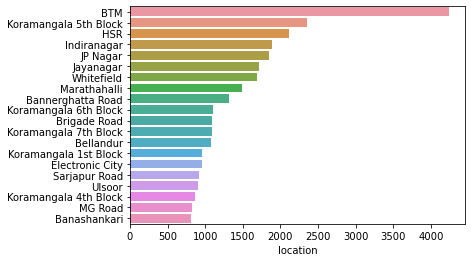

In [205]:
sns.barplot(restaurant_location,restaurant_location.index)

# Finding the latitudes and longitudes for each of the location

In [206]:
locations=pd.DataFrame({'Name':df['location'].unique()})

In [207]:
locations.head()

Name
0        Banashankari
1        Basavanagudi
2         Mysore Road
3           Jayanagar
4  Kumaraswamy Layout

In [208]:
!pip install geopy

In [209]:
from geopy.geocoders import Nominatim

In [210]:
geolocator=Nominatim(user_agent='app')

In [214]:
lat_lon=[]
for location in locations['Name']:
    location=geolocator.geocode(location)
    if location is None:
        lat_lon.append(np.nan)
    else:
        geo=(location.latitude,location.longitude)
        lat_lon.append(geo)

In [215]:
locations['geo_loc']=lat_lon

In [216]:
locations.head()

Name                           geo_loc
0        Banashankari          (15.8876779, 75.7046777)
1        Basavanagudi          (12.9417261, 77.5755021)
2         Mysore Road          (12.9467026, 77.5300705)
3           Jayanagar  (27.64392675, 83.05280519687284)
4  Kumaraswamy Layout          (12.9081487, 77.5553179)

In [217]:
Rest_locations=pd.DataFrame(df['location'].value_counts().reset_index())

In [218]:
Rest_locations

index  location
0                     BTM      4237
1   Koramangala 5th Block      2358
2                     HSR      2113
3             Indiranagar      1892
4                JP Nagar      1849
..                    ...       ...
87         West Bangalore         5
88              Yelahanka         4
89   Rajarajeshwari Nagar         2
90             Nagarbhavi         1
91                 Peenya         1

[92 rows x 2 columns]

In [225]:
Rest_locations.columns=['Name','count']

In [226]:
Rest_locations

Name  count
0                     BTM   4237
1   Koramangala 5th Block   2358
2                     HSR   2113
3             Indiranagar   1892
4                JP Nagar   1849
..                    ...    ...
87         West Bangalore      5
88              Yelahanka      4
89   Rajarajeshwari Nagar      2
90             Nagarbhavi      1
91                 Peenya      1

[92 rows x 2 columns]

In [227]:
locations.shape

(92, 2)

In [228]:
Rest_locations.shape

(92, 2)

In [229]:
Restaurant_locations=Rest_locations.merge(locations,on='Name',how='left').dropna()

In [230]:
Restaurant_locations.head()

Name  count                             geo_loc
0                    BTM   4237  (45.95485055, -112.49659530324134)
1  Koramangala 5th Block   2358            (12.9348429, 77.6189768)
2                    HSR   2113                (18.1475, 41.538889)
3            Indiranagar   1892            (12.9732913, 77.6404672)
4               JP Nagar   1849            (12.2655944, 76.6465404)

In [231]:
np.array(Restaurant_locations['geo_loc'])

array([(45.95485055, -112.49659530324134), (12.9348429, 77.6189768),
       (18.1475, 41.538889), (12.9732913, 77.6404672),
       (12.2655944, 76.6465404), (27.64392675, 83.05280519687284),
       (53.5533682, -2.2969019), (12.9552572, 77.6984163),
       (12.8905219, 77.598149), (12.9390255, 77.6238477),
       (50.7962518, -120.3174744), (12.9364846, 77.6134783),
       (12.93103185, 77.6782471), (12.9275886, 77.6308832),
       (12.848759900000001, 77.64825295827616), (12.920441, 77.6653284),
       (12.9778793, 77.6246697), (12.9327778, 77.6294052),
       (12.9755264, 77.6067902), (15.8876779, 75.7046777),
       (13.0221416, 77.6403368), (13.0027353, 77.5703253),
       (12.9417261, 77.5755021), (40.5762419, -74.1265037),
       (34.0702921, 74.8090203), (33.5935063, -79.0345627),
       (12.996845, 77.6130165), (40.7144331, -74.0083496),
       (13.0093455, 77.6377094), (13.0393922, 77.564105),
       (40.7652844, -76.373824), (13.0141618, 77.6518539),
       (12.9882338, 77.55

In [234]:
lat,lon=zip(*np.array(Restaurant_locations['geo_loc']))

In [235]:
type(lat)

tuple

In [238]:
Restaurant_locations['lat']=lat
Restaurant_locations['lon']=lon

In [239]:
Restaurant_locations.head()

Name  count                             geo_loc  \
0                    BTM   4237  (45.95485055, -112.49659530324134)   
1  Koramangala 5th Block   2358            (12.9348429, 77.6189768)   
2                    HSR   2113                (18.1475, 41.538889)   
3            Indiranagar   1892            (12.9732913, 77.6404672)   
4               JP Nagar   1849            (12.2655944, 76.6465404)   

         lat         lon  
0  45.954851 -112.496595  
1  12.934843   77.618977  
2  18.147500   41.538889  
3  12.973291   77.640467  
4  12.265594   76.646540

In [240]:
Restaurant_locations.drop('geo_loc',axis=1,inplace=True)

In [241]:
Restaurant_locations.head()

Name  count        lat         lon
0                    BTM   4237  45.954851 -112.496595
1  Koramangala 5th Block   2358  12.934843   77.618977
2                    HSR   2113  18.147500   41.538889
3            Indiranagar   1892  12.973291   77.640467
4               JP Nagar   1849  12.265594   76.646540

In [242]:
!pip install folium

In [243]:
import folium
from folium.plugins import HeatMap 

In [249]:
def generatebasemap(default_location=[12.97,77.59],default_zoom_start=12):
    basemap=folium.Map(location=default_location,zoom_start=default_zoom_start)
    return basemap

In [250]:
basemap=generatebasemap()

In [251]:
basemap

# Heatmap for restaurants in bengaluru

In [253]:
HeatMap(Restaurant_locations[['lat','lon','count']].values.tolist(),zoom=20,radius=15).add_to(basemap)

In [254]:
basemap